<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
<span><img src="media/both-logos-small-alpha.png" /></span>
</div>

# `matplotlib` - 2D

## Complément - niveau basique

Plutôt que de récrire (encore) un tutorial sur `matplotlib`, je préfère utiliser les ressources disponibles en ligne en anglais :

* pour la dimension 2 : [https://matplotlib.org/2.0.2/users/pyplot_tutorial.html](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html) ;
* pour la dimension 3 : [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

Je vais essentiellement utiliser des extraits tels quels. N'hésitez pas à consulter ces documents originaux pour davantage de précisions.

In [1]:
# les imports habituels
import numpy as np
import matplotlib.pyplot as plt

Intentionnellement dans ce notebook, on ne va pas utiliser le mode automatique de `matplotlib` dans les notebooks (pour rappel, `plt.ion()`), car on veut justement apprendre à utiliser `matplotlib` dans un contexte normal.

### `plt.plot`

Nous avons déjà vu plusieurs fois comment tracer une courbe avec `matplotlib`, avec la fonction `plot`. Si on donne seulement *une* liste de valeurs, elles sont considérées comme les *Y*, les *X* étant les entiers en nombre suffisant et en commençant à 0.

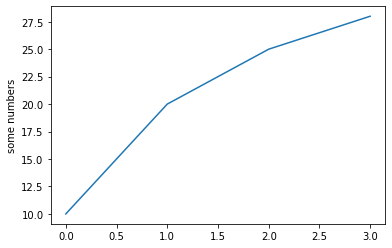

In [2]:
# si je ne donne qu'une seule liste à plot
# alors ce sont les Y
plt.plot([10, 20, 25, 28])
# on peut aussi facilement ajouter une légende
# ici sur l'axe des y
plt.ylabel('some numbers')

plt.show()

On peut changer le style utilisé par `plot` pour tracer ; ce style est spécifié sous la forme d'une chaîne de caractères, par défaut `'b-'`, qui signifie une ligne bleue (`b` pour bleu, et `-` pour ligne). Ici on va préciser à la place `ro`, `r` qui signifie rouge et `o` qui signifie cercle.

Voyez [la documentation de référence de plot](https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.plot) pour une liste complète.

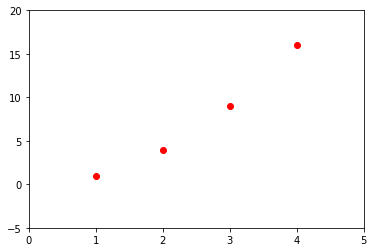

In [3]:
# mais le plus souvent on passe à plot
# une liste de X ET une liste de Y
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], 'ro')

# ici on veut dire d'utiliser
# pour l'axe des X : entre 0 et 5
# pour l'axe des Y : entre -5 et 20
plt.axis([0, 5, -5, 20])

plt.show()

On peut très simplement dessiner plusieurs fonctions dans la même zone :

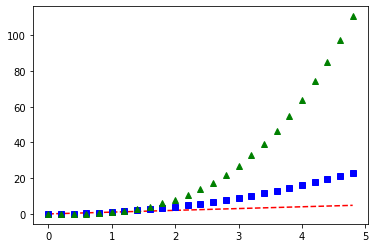

In [4]:
# échantillon de points entre 0 et 5 espacés de 0.2
t = np.arange(0., 5., 0.2)

# plusieurs styles de ligne
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# on pourrait ajouter d'autres plot bien sûr aussi
plt.show()

### Plusieurs *subplots*

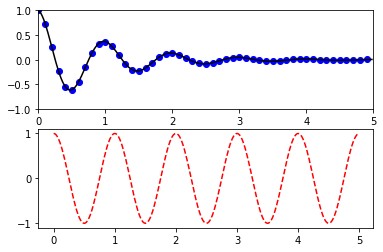

In [5]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

## deux domaines presque identiques
# celui-ci pour les points bleus
t1 = np.arange(0.0, 5.0, 0.1)
# celui-ci pour la ligne bleue
t2 = np.arange(0.0, 5.0, 0.02)

# cet appel n'est pas nécessaire
# vous pouvez vérifier qu'on pourrait l'enlever
plt.figure(1)
# on crée un 'subplot'
plt.subplot(211)
# le fonctionnement de matplotlib est dit 'stateful'
# par défaut on dessine dans le dernier objet créé
plt.axis([0, 5, -1, 1])
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# une deuxième subplot
plt.subplot(212)
# on écrit dedans
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

C'est pour pouvoir construire de tels assemblages qu'il y a une fonction `plt.show()`, qui indique que la figure est terminée.

Il faut revenir un peu sur les arguments passés à `subplot`. Lorsqu'on écrit :
```python
plt.subplot(211)
```
ce qui est par ailleurs juste un raccourci pour :
```python
plt.subplot(2, 1, 1)
```
on veut dire qu'on veut créer un quadrillage de 2 lignes de 1 colonne, et que le subplot va occuper le 1er emplacement.

### Plusieurs figures

En fait, on peut créer plusieurs figures, et plusieurs *subplots* dans chaque figure. Dans l'exemple qui suit on illustre encore mieux cette notion de *statefulness*. Je commence par vous donner l'exemple du tutorial tel quel :

C:\Users\fgoumard\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


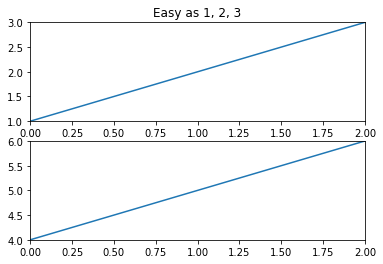

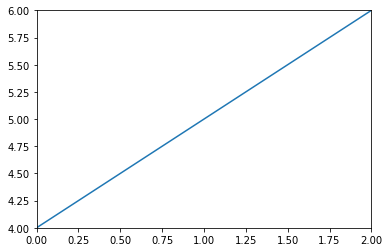

In [6]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.axis([0, 2, 1, 3])
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.axis([0, 2, 4, 6])
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.axis([0, 2, 4, 6])
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

Cette façon de faire est améliorable. D'abord c'est source d'erreurs, il faut se souvenir de ce qui précède, et du coup, si on change un tout petit peu la logique, ça risque de casser tout le reste. En outre selon les environnements, on peut obtenir un vilain avertissement.

C'est pourquoi je vous conseille plutôt, pour faire la même chose que ci-dessus, d'utiliser `plt.subplots` qui vous retourne la figure avec ses *subplots*, que vous pouvez ranger dans des variables Python :

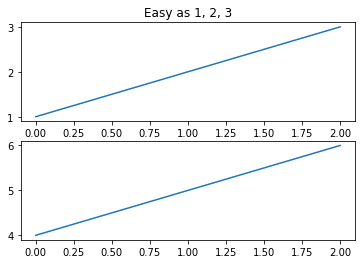

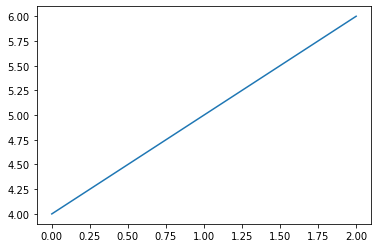

In [7]:
# c'est assez déroutant au départ, mais
# traditionnellement les subplots sont appelés 'axes'
# c'est pourquoi ici on utilise ax1, ax2 et ax3 pour désigner
# des subplots

# ici je crée une figure et deux subplots,
# sur une grille de 2 lignes * 1 colonne
fig1, (ax1, ax2) = plt.subplots(2, 1)

# au lieu de faire plt.plot, vous pouvez envoyer
# la méthode plot à un subplot
ax1.plot([1, 2, 3])
ax2.plot([4, 5, 6])

fig2, ax3 = plt.subplots(1, 1)
ax3.plot([4, 5, 6])

# pour revenir au premier subplot
# il suffit d'utiliser la variable ax1
# attention on avait fait avec 'plt.title'
# ici c'est la méthode 'set_title'
ax1.set_title('Easy as 1, 2, 3')

plt.show()

### `plt.hist`

S'agissant de la dimension 2, voici le dernier exemple que nous tirons du tutoriel `matplotlib`, surtout pour illustrer [`plt.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=matplotlib%20pyplot%20hist#matplotlib.pyplot.hist), mais qui montre aussi comment ajouter du texte :

C:\Users\fgoumard\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


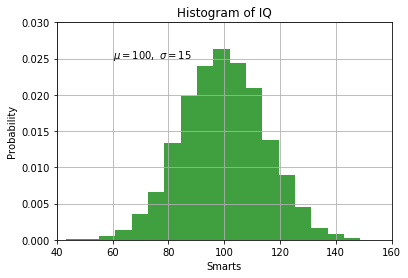

In [8]:
# pour être reproductible, on fixe la graine
# du générateur aléatoire
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# dessiner un histogramme
# on range les valeurs en 20 boites (bins)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### `plt.scatter`

Je vous recommande aussi de regarder également la fonction [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=matplotlib%20pyplot%20scatter#matplotlib.pyplot.scatter) qui permet de faire par exemple des choses comme ceci :

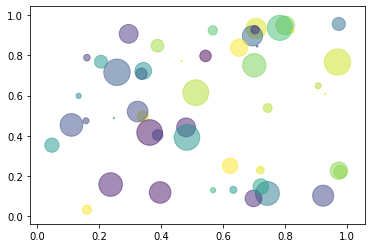

In [9]:
# pour être reproductible, on fixe la graine
# du générateur aléatoire
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### `plt.boxplot`

Avec [`boxplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) vous obtenez des boîtes à moustache :

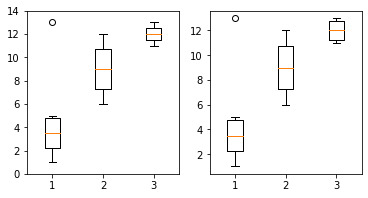

In [10]:
plt.figure(figsize=(6, 3))

plt.subplot(121)
# on peut passer à boxplot une liste de suites de nombres
# chaque suite donne lieu à une boite à moustache
# ici 3 suites
plt.boxplot([[1, 2, 3, 4, 5, 13], [6, 7, 8, 10, 11, 12], [11, 12 ,13]])
plt.ylim(0, 14)

plt.subplot(122)
# on peut aussi comme toujours lui passer un ndarray numpy
# attention c'est lu dans l'autre sens, ici aussi on a 3 suites de nombres
plt.boxplot(np.array([[1, 6, 11],
                      [2, 7, 12],
                      [3, 8, 13],
                      [4, 10, 11],
                      [5, 11, 12],
                      [13, 12, 13]]))
plt.show()